In [2]:
# loading the dataset:
!gdown --id 1oqbv5XGqlZ3RknDPV5Df4fYBc5tclcA2

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oqbv5XGqlZ3RknDPV5Df4fYBc5tclcA2
To: /content/BTC-CoinDesk-Data.csv
100% 179k/179k [00:00<00:00, 120MB/s]


In [5]:
# importing time series data with pandas
import pandas as pd

def load_data(file_path):
    dtype_dict = {'Price': 'float', 'Volume': 'int'}
    return pd.read_csv(
        file_path,
        dtype=dtype_dict,
        parse_dates=True,
        index_col='Date'
    )

# Use the function to load the data
df = load_data('/content/BTC-CoinDesk-Data.csv')

In [6]:
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [9]:
# data spanning over 8 years!
len(df)

2787

In [11]:
# keeping only date and the closing price:
df_final = df.drop(['Currency', '24h Open (USD)', '24h High (USD)', '24h Low (USD)'], axis=1)

In [12]:
df_final

,Closing Price (USD)
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


<Axes: xlabel='Date'>

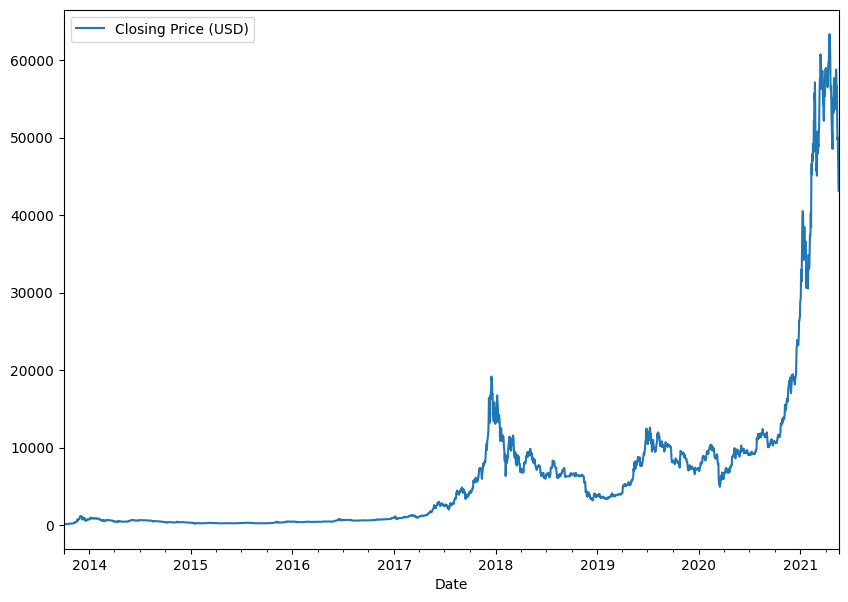

In [20]:
import seaborn as sns
df_final.plot(figsize=(10, 7)) # plotting variation of price vs date

In [18]:
import csv
from datetime import datetime

date_list = []
price_list = []

with open("/content/BTC-CoinDesk-Data.csv", "r") as file:
  reader = csv.reader(file, delimiter=',')
  next(reader)  # Skipping the header
  for record in reader:
    date_list.append(datetime.strptime(record[1], "%Y-%m-%d"))
    price_list.append(float(record[2]))

# Display the first 5 entries:
date_list[:5], price_list[:5]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0)],
 [123.65499, 125.455, 108.58483, 118.67466, 121.33866])

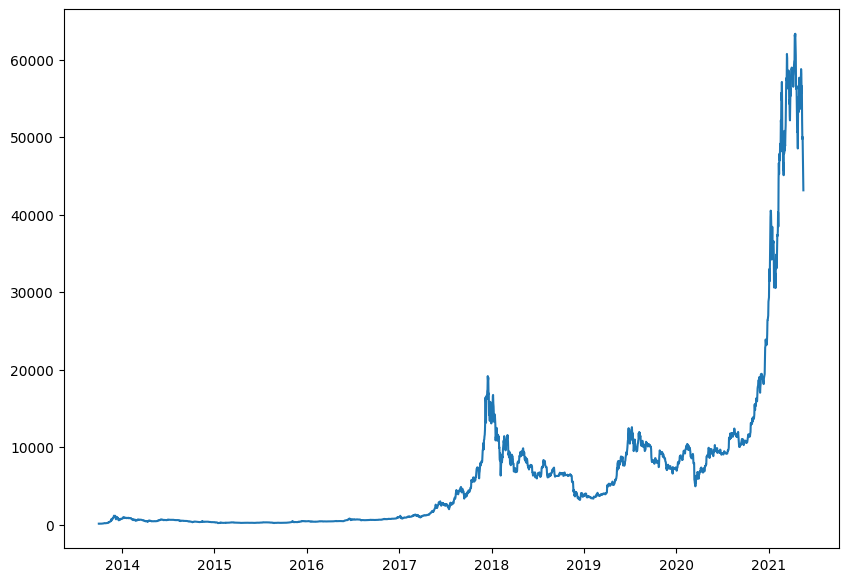

In [19]:
# plot data loaded from python csv loader
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(date_list, price_list)

In [22]:
# creating train-test splits in time series data

split_size = int(0.8* len(price_list))

X_train, y_train = date_list[:split_size], price_list[:split_size]
X_test, y_test = date_list[split_size:], price_list[split_size:]

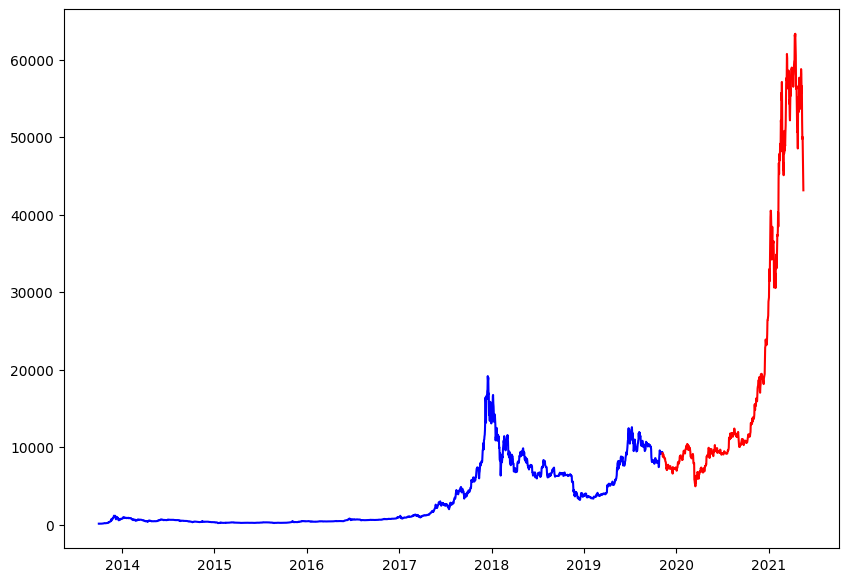

In [24]:
plt.figure(figsize=(10, 7))
plt.plot(X_train, y_train, label='Training Data', color='blue')
plt.plot(X_test, y_test, label='Test Data', color='red')